#Importing Data and libraries
Importing Data from Coursework_1_data.csv file and selecting and importing all necessary libraries and models required for the program.

In [ ]:
#CMT307- Coursework
#Student Number- C2049783
%cd sample_data

/content/sample_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

coursework= pd.read_csv("Coursework_1_data.csv")


# Data Exploration
Here we will have an in-depth look at the data and it's consequent analysis using countplots, scatterplots and correlation matrix etc.

In [ ]:
#Looking at our coursweork dataset and its attributes
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nInformation of the coursework dataset...... \n')
print(coursework.info())
print('\nColumn names of the dataset...... \n', coursework.columns)
print('\nBelow is the first few lines of the dataset......\n', coursework.head(10))


Information of the coursework dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   1233

In [ ]:
#Changing specific attributes to object type as they are categorical variables
arr = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

for i in arr:
    print('{} : {}'.format(i, coursework[i].unique()))
for i in arr:
    coursework[i] = coursework[i].astype('object')
coursework.info()
coursework.describe()

OperatingSystems : [1 2 4 3 7 6 8 5]
Browser : [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region : [1 9 2 3 4 5 6 7 8]
TrafficType : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  obje

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
#checking for missing data
coursework.isnull().sum() 

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

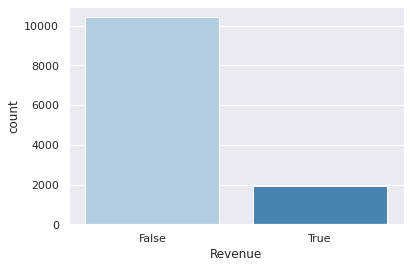

In [ ]:
#Target column visualization
sns.set_theme(style='darkgrid')

sns.countplot(coursework['Revenue'], palette='Blues')

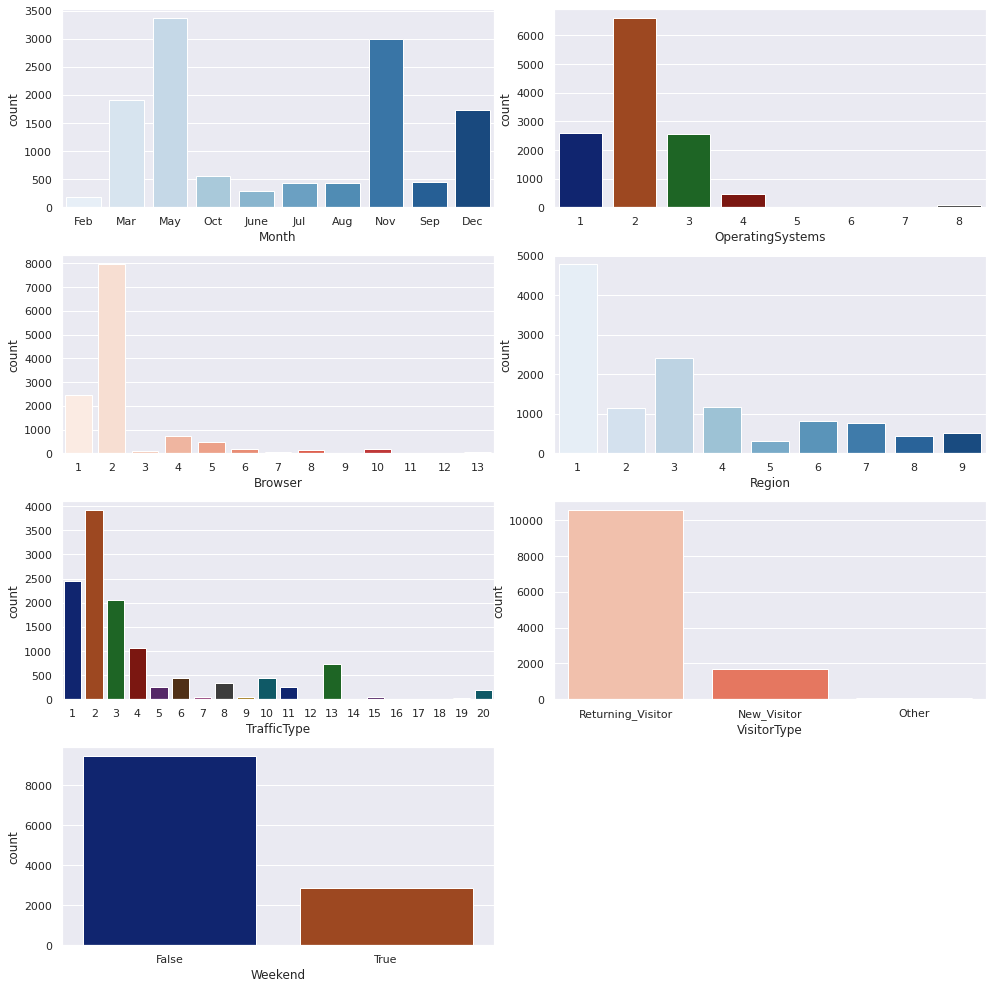

In [ ]:
#Looking at the distribution of categorical variables
fig, ax = plt.subplots(4,2, figsize=(14,14))
fig.tight_layout(pad=2)

sns.countplot(coursework['Month'], palette='Blues', ax = ax[0,0])
sns.countplot(coursework['OperatingSystems'], palette='dark', ax = ax[0,1])
sns.countplot(coursework['Browser'], palette='Reds', ax = ax[1,0])
sns.countplot(coursework['Region'], palette='Blues', ax = ax[1,1])
sns.countplot(coursework['TrafficType'], palette='dark', ax = ax[2,0])
sns.countplot(coursework['VisitorType'], palette='Reds', ax = ax[2,1])
sns.countplot(coursework['Weekend'], palette='dark', ax = ax[3,0])
ax[3,1].set_axis_off()

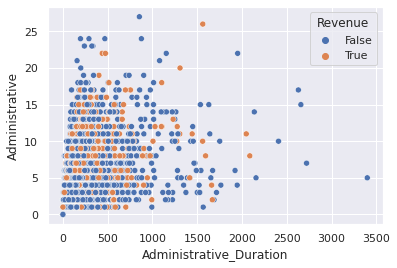

In [ ]:
sns.scatterplot(coursework['Administrative_Duration'], coursework['Administrative'], hue=coursework['Revenue'])

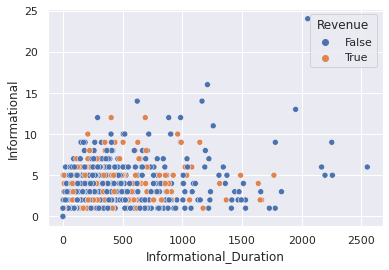

In [ ]:
sns.scatterplot(coursework['Informational_Duration'], coursework['Informational'], hue=coursework['Revenue'])

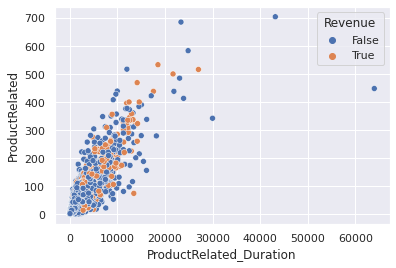

In [ ]:
sns.scatterplot(coursework['ProductRelated_Duration'], coursework['ProductRelated'], hue=coursework['Revenue'])

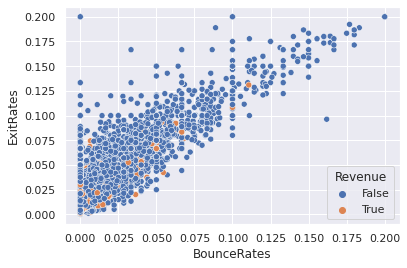

In [ ]:
sns.scatterplot(coursework['BounceRates'], coursework['ExitRates'], hue=coursework['Revenue'])

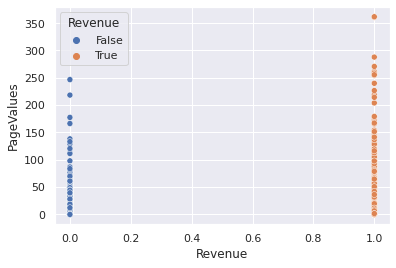

In [ ]:
sns.scatterplot(coursework['Revenue'], coursework['PageValues'], hue=coursework['Revenue'])

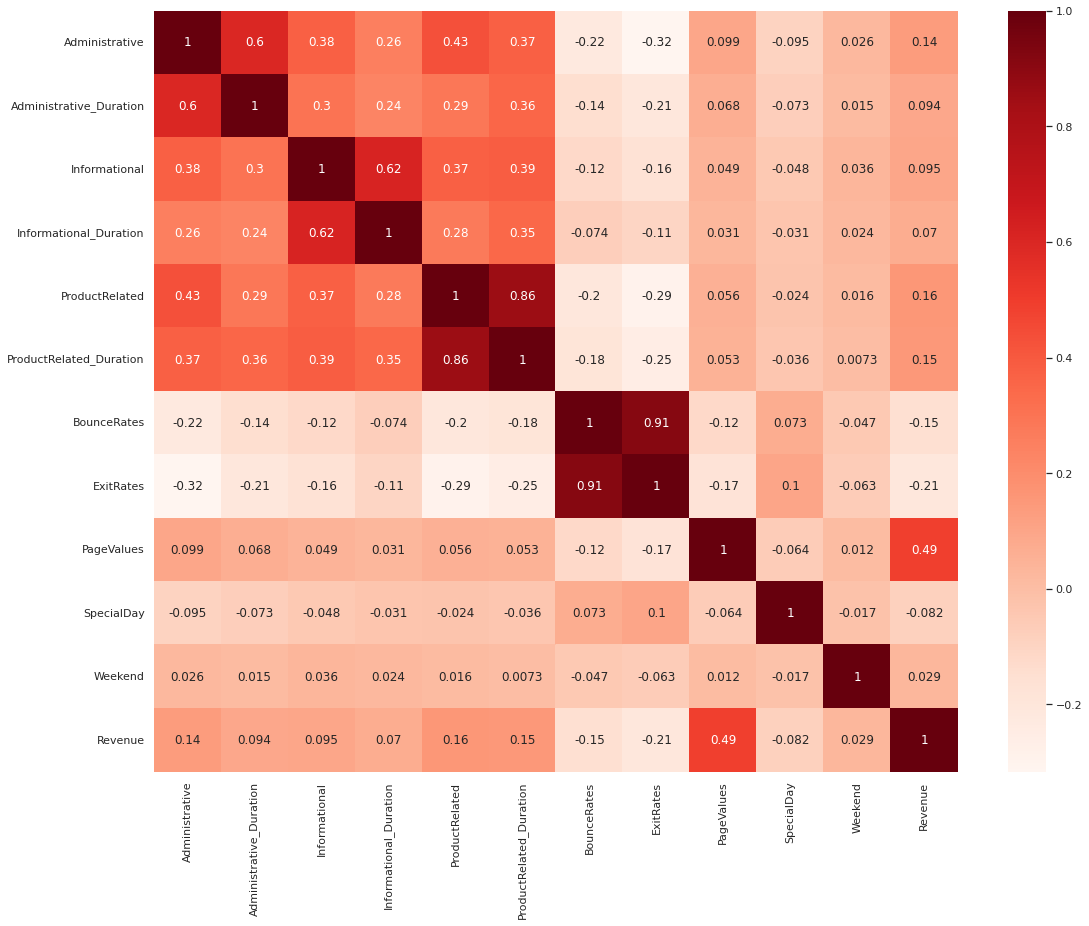

In [ ]:
#Looking at the correlation matrix
plt.figure(figsize = (18,14))
sns.heatmap(coursework.corr(), cmap = 'Reds',annot = True)

In [ ]:
#Looking at the correlation between the target variable and other variables
coursework.corr()['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

# Data Pre-processing
Here we will do the pre-processing of our coursework dataset making it ready for the machine learning classifiers. It will be done using feature scaling and splitting data into training and test datasets respectively.

In [ ]:
#Splitting Dataset into traning and test set
course_x = coursework[['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType' , 'VisitorType', 'Weekend']]
course_y = coursework[['Revenue']]
X_train, X_test, y_train, y_test = train_test_split(course_x, course_y, test_size=0.3, random_state=42)
X_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,Nov,1,8,6,11,Returning_Visitor,False
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,Mar,2,2,3,2,Returning_Visitor,False
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,Nov,2,2,2,2,Returning_Visitor,False
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,Aug,2,5,7,4,Returning_Visitor,False
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,Aug,2,2,3,1,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0,0.000000,0,0.00,12,1165.333333,0.004167,0.043056,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False
6733,2,35.200000,2,98.80,84,8365.602222,0.008915,0.037209,0.000000,0.0,Sep,2,2,5,1,Returning_Visitor,False
2404,0,0.000000,0,0.00,10,196.500000,0.044444,0.066667,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False
5491,1,23.200000,0,0.00,30,964.466667,0.000000,0.003571,51.033625,0.0,Oct,2,2,5,2,New_Visitor,False


In [ ]:
# transformer for all features
categorical_attributes = ['OperatingSystems', 'Browser', 'TrafficType', 'Month','Region', 'VisitorType', 'Weekend']
numeric_attributes = ['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
s = [('cat', OneHotEncoder(), categorical_attributes), ('num', StandardScaler(), numeric_attributes)]
col_transform= ColumnTransformer(transformers= s)
col_transform.fit(course_x)
X_train = col_transform.transform(X_train)
X_test= col_transform.transform(X_test)

X_train

<8631x75 sparse matrix of type '<class 'numpy.float64'>'
	with 146727 stored elements in Compressed Sparse Row format>

In [ ]:
#We create new examples for our minority class by generating synthetic data with SMOTE
smote = SMOTE(sampling_strategy='minority')

X_train,y_train = smote.fit_resample(X_train, y_train)

# Model Trainings, Predictions and Evaluations
Here we train 3 separate classifiers with the training datasets and consequently check for their predictions against the test dataset. The results are then analyzed and evaluated to draw conclusions.

In [ ]:
Classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
Classifier1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred= Classifier1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8948364422816978


In [ ]:
#Classification report for 1st classifier
y_pred = Classifier1.predict(X_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average= None)
cf_matrix1=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94      3124
        True       0.66      0.67      0.66       575

    accuracy                           0.89      3699
   macro avg       0.80      0.80      0.80      3699
weighted avg       0.90      0.89      0.90      3699



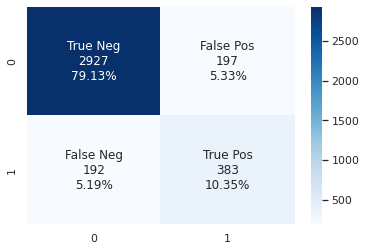

In [ ]:
#Confusion Matrix for 1st Classifier
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Taking 3 classifiers for creating an ensemble voting classifier
log_classifier = LogisticRegression(solver="lbfgs", random_state=42)       # logistic regression classifier
kn_classifier = KNeighborsClassifier()                                     # KNeighbors classifier
svm_classifier = SVC(gamma="scale", random_state=42, probability=True)     # SVM classifier

# combining the above 3 classifiers using 'soft' majority voting
Classifier2 = VotingClassifier(
    estimators=[('lr', log_classifier), ('kn', kn_classifier), ('svc', svm_classifier)],
    voting='soft')

In [ ]:
Classifier2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('kn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
#Looking at the accuracies for each clssifier as compared to the voting/ensemble classifier
for i in (log_classifier, kn_classifier, svm_classifier, Classifier2):
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(i.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8429305217626385
KNeighborsClassifier 0.7518248175182481
SVC 0.8705055420383887
VotingClassifier 0.8526628818599622


In [ ]:
#Classification report for 2nd classifier
y_pred = Classifier2.predict(X_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average= None)
cf_matrix2=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      3124
        True       0.52      0.74      0.61       575

    accuracy                           0.85      3699
   macro avg       0.73      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699



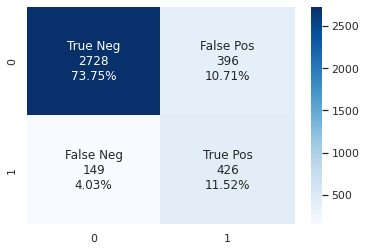

In [ ]:
#Confusion Matrix for 2nd classifier
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Using multiple DecisionTree classifiers to create a boostrap aggregation(bagging) ensemble classifier
Classifier3 = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=207, bootstrap=True, random_state=42)
Classifier3.fit(X_train, y_train)
y_pred = Classifier3.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8707758853744255


In [ ]:
#Classification report for 3rd Classifier
y_pred = Classifier3.predict(X_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average= None)
cf_matrix3=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      3124
        True       0.56      0.80      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.90      0.87      0.88      3699



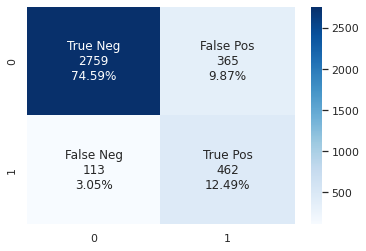

In [ ]:
#Confusion matrix for 3rd classifier
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix3, annot=labels, fmt='', cmap='Blues')

# Optimization
Here we will try to optimize the models using hyperparameter tuning and GridSearch model.

In [ ]:
#hyperparameter tuning for Classifier 1
param_grid = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

grid1 = GridSearchCV(estimator=Classifier1, param_grid=param_grid
      , scoring = 'roc_auc')
grid1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]},
             scoring='roc_auc')

As we can observe, the accuracy of the first random forest classifier doesn't improve much.

In [ ]:
y_pred = grid1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8796972154636388


In [ ]:
#Hyperparameter tuning for Classifier 2
params = {'lr__C': [1.0, 100.0],
      'svc__C': [2,3,4],}

grid2 = GridSearchCV(estimator=Classifier2, param_grid=params, cv=5, scoring= 'neg_log_loss')

grid2.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(random_state=42)),
                                                    ('kn',
                                                     KNeighborsClassifier()),
                                                    ('svc',
                                                     SVC(probability=True,
                                                         random_state=42))],
                                        voting='soft'),
             param_grid={'lr__C': [1.0, 100.0], 'svc__C': [2, 3, 4]},
             scoring='neg_log_loss')

As we can observe from below, the accuracy of the second(voting, ensemble) classifier improves becuase of hyperparameter tuning.

In [ ]:
y_pred = grid2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8596918085969181


In [ ]:
#Hyperparameter tuning for Classifier 3
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
grid3 = GridSearchCV(Classifier3, param_grid, scoring = 'roc_auc')
grid3.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                         max_samples=207, n_estimators=500,
                                         random_state=42),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='roc_auc')

The prediction accuracy of the third(bagging, ensemble) classifier improves significantly with the use of hyperparameter tuning.

In [ ]:
y_pred = grid3.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8772641254393079


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93      3124
        True       0.58      0.78      0.67       575

    accuracy                           0.88      3699
   macro avg       0.77      0.84      0.80      3699
weighted avg       0.90      0.88      0.89      3699



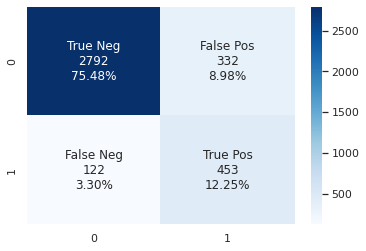

In [ ]:
cf_matrix4=confusion_matrix(y_test, y_pred)
#Confusion matrix for 3rd classifier
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix4.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix4, annot=labels, fmt='', cmap='Blues')